# Data Project - Stock Market Analysis 

![techAnalysis-1000x500.jpg](attachment:techAnalysis-1000x500.jpg)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# import yfinance as yf
# For time stamps
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import GRU,LSTM, Bidirectional,Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, ELU, ReLU
from tensorflow.keras import Sequential, regularizers
from tensorflow.python.client import device_lib

Mounted at /content/drive


In [2]:

boa=pd.read_csv('/content/drive/MyDrive/B.csv')

In [3]:
boa

,Date,Ouverture,Plus haut,Plus bas,Prix,Quantité
0,2015-01-02,214.00,218.50,214.0,218.50,602.0
1,2015-01-06,214.10,215.00,214.0,215.00,440.0
2,2015-01-07,214.20,217.95,214.2,217.95,10115.0
3,2015-01-08,217.00,221.00,217.0,220.00,8996.0
4,2015-01-09,218.05,220.00,217.0,219.90,39791.0
...,...,...,...,...,...,...
1837,2022-05-26,194.00,194.00,194.0,194.00,270.0
1838,2022-05-27,193.00,193.00,191.0,191.00,18436.0
1839,2022-05-30,191.00,191.10,191.0,191.10,48898.0
1840,2022-05-31,191.00,193.00,191.0,191.10,14490.0


In [4]:
boa.Date=pd.to_datetime(boa.Date ,format='%Y/%m/%d')
# mng=mng.sort_values(by=['Date'] , ascending=False)

In [5]:
boa.dtypes

Date         datetime64[ns]
Ouverture           float64
Plus haut           float64
Plus bas            float64
Prix                float64
Quantité            float64
dtype: object

In [6]:
boa.isna().sum()

Date         0
Ouverture    0
Plus haut    0
Plus bas     0
Prix         0
Quantité     0
dtype: int64

In [7]:
boa.bfill()

,Date,Ouverture,Plus haut,Plus bas,Prix,Quantité
0,2015-01-02,214.00,218.50,214.0,218.50,602.0
1,2015-01-06,214.10,215.00,214.0,215.00,440.0
2,2015-01-07,214.20,217.95,214.2,217.95,10115.0
3,2015-01-08,217.00,221.00,217.0,220.00,8996.0
4,2015-01-09,218.05,220.00,217.0,219.90,39791.0
...,...,...,...,...,...,...
1837,2022-05-26,194.00,194.00,194.0,194.00,270.0
1838,2022-05-27,193.00,193.00,191.0,191.00,18436.0
1839,2022-05-30,191.00,191.10,191.0,191.10,48898.0
1840,2022-05-31,191.00,193.00,191.0,191.10,14490.0


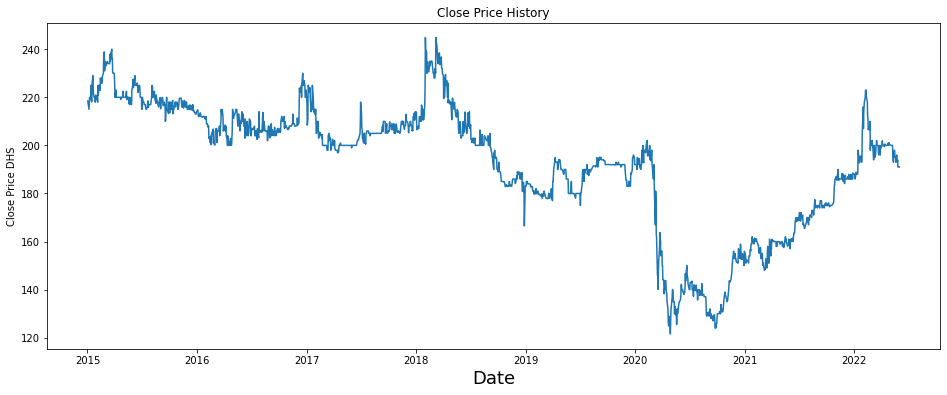

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(boa['Date'], boa['Prix'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price DHS', fontsize=10)
plt.show()

In [9]:
boa

,Date,Ouverture,Plus haut,Plus bas,Prix,Quantité
0,2015-01-02,214.00,218.50,214.0,218.50,602.0
1,2015-01-06,214.10,215.00,214.0,215.00,440.0
2,2015-01-07,214.20,217.95,214.2,217.95,10115.0
3,2015-01-08,217.00,221.00,217.0,220.00,8996.0
4,2015-01-09,218.05,220.00,217.0,219.90,39791.0
...,...,...,...,...,...,...
1837,2022-05-26,194.00,194.00,194.0,194.00,270.0
1838,2022-05-27,193.00,193.00,191.0,191.00,18436.0
1839,2022-05-30,191.00,191.10,191.0,191.10,48898.0
1840,2022-05-31,191.00,193.00,191.0,191.10,14490.0


In [10]:
# Calculate technical indicators
def get_technical_indicators(data):
    # Create 7 and 21 days Moving Average
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean()
    data['MA21'] = data.iloc[:,4].rolling(window=21).mean()

    # Create MACD
    data['MACD'] =data.iloc[:,4].ewm(span=12,adjust=False).mean()- data.iloc[:,4].ewm(span=26).mean() 
    # df['e26'] = pd.Series.ewm(df['close'], span=26).mean()
    # df['e12'] = pd.Series.ewm(df['close'], span=12).mean() Calcul du moving average convergence divergence ratio
    # df['MACD'] = df['e12'] - df['e26']

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA21'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA21'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data
# mng.Close=np.log(mng.Close)
T_df = get_technical_indicators(boa)

T_df

,Date,Ouverture,Plus haut,Plus bas,Prix,Quantité,MA7,MA21,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2015-01-02,214.00,218.50,214.0,218.50,602.0,NaN,NaN,0.000000,NaN,NaN,NaN,218.500000,5.382199
1,2015-01-06,214.10,215.00,214.0,215.00,440.0,NaN,NaN,1.278846,NaN,NaN,NaN,215.875000,5.365976
2,2015-01-07,214.20,217.95,214.2,217.95,10115.0,NaN,NaN,0.821740,NaN,NaN,NaN,217.311538,5.379667
3,2015-01-08,217.00,221.00,217.0,220.00,8996.0,NaN,NaN,0.335539,NaN,NaN,NaN,219.126250,5.389072
4,2015-01-09,218.05,220.00,217.0,219.90,39791.0,NaN,NaN,0.130776,NaN,NaN,NaN,219.644215,5.388615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,2022-05-26,194.00,194.00,194.0,194.00,270.0,194.285714,196.966667,-1.568112,2.974536,202.915738,191.017596,193.823424,5.262690
1838,2022-05-27,193.00,193.00,191.0,191.00,18436.0,193.714286,196.535714,-1.783901,3.072453,202.680620,190.390808,191.941141,5.247024
1839,2022-05-30,191.00,191.10,191.0,191.10,48898.0,193.157143,196.064286,-1.924659,3.074996,202.214277,189.914294,191.380380,5.247550
1840,2022-05-31,191.00,193.00,191.0,191.10,14490.0,192.885714,195.592857,-2.013007,3.039801,201.672458,189.513256,191.193460,5.247550


In [11]:
T_df[:22] # on doit supprimer les valeurs nulles

,Date,Ouverture,Plus haut,Plus bas,Prix,Quantité,MA7,MA21,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2015-01-02,214.00,218.50,214.00,218.50,602.0,NaN,NaN,0.000000,NaN,NaN,NaN,218.500000,5.382199
1,2015-01-06,214.10,215.00,214.00,215.00,440.0,NaN,NaN,1.278846,NaN,NaN,NaN,215.875000,5.365976
2,2015-01-07,214.20,217.95,214.20,217.95,10115.0,NaN,NaN,0.821740,NaN,NaN,NaN,217.311538,5.379667
3,2015-01-08,217.00,221.00,217.00,220.00,8996.0,NaN,NaN,0.335539,NaN,NaN,NaN,219.126250,5.389072
4,2015-01-09,218.05,220.00,217.00,219.90,39791.0,NaN,NaN,0.130776,NaN,NaN,NaN,219.644215,5.388615
5,2015-01-12,218.00,219.00,218.00,219.00,494.0,NaN,NaN,0.082468,NaN,NaN,NaN,219.214148,5.384495
6,2015-01-13,220.00,225.00,220.00,225.00,11475.0,219.335714,NaN,-0.085860,NaN,NaN,NaN,223.073147,5.411646
7,2015-01-14,220.00,220.00,220.00,220.00,1504.0,219.550000,NaN,-0.075067,NaN,NaN,NaN,221.024070,5.389072
8,2015-01-15,220.00,220.00,218.00,218.10,1748.0,219.992857,NaN,-0.072638,NaN,NaN,NaN,219.074591,5.380358
9,2015-01-16,225.00,225.00,225.00,225.00,3000.0,221.000000,NaN,0.026043,NaN,NaN,NaN,223.024931,5.411646


[00:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


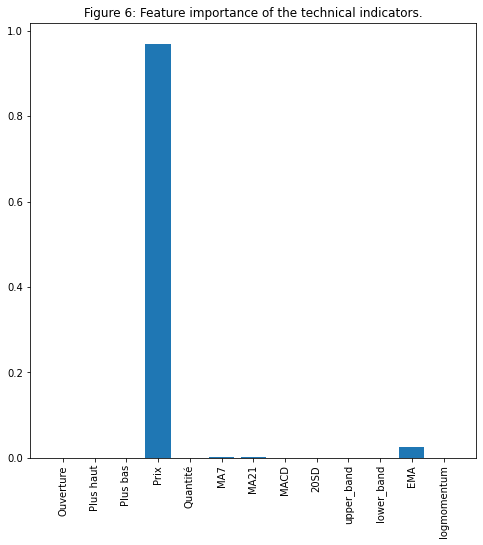

In [12]:
import xgboost as xgb
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Prix']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(T_df)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

il parait  que MA7, MA21 et EMA qu'on a ajouté sont parmi  des caractéristiques importantes. ce qui est logiques puisqu'ils sont utilisé par les experts de trading dans l'analyse technique. On va alors les prendre en compte dans notre analyse 

# Fourrier Transform

In [13]:
#Drop the first 21 rows
#For doing the fourier
dataset = T_df.iloc[20:,:].reset_index(drop=True)

#Getting the Fourier transform features
def get_fourier_transfer(dataset):
    # Get the columns for doing fourier
    data_FT = dataset[[ 'Prix']]

    close_fft = np.fft.fft(np.asarray(data_FT['Prix'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_com_df = pd.DataFrame()
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        fft_ = np.fft.ifft(fft_list_m10)
        fft_com = pd.DataFrame({'fft': fft_})
        fft_com['absolute of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.abs(x))
        fft_com['angle of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.angle(x))
        fft_com = fft_com.drop(columns='fft')
        fft_com_df = pd.concat([fft_com_df, fft_com], axis=1)

    return fft_com_df


In [14]:
#Get Fourier features
dataset_F = get_fourier_transfer(dataset)
Final_data = pd.concat([dataset, dataset_F], axis=1)


print(Final_data.head())


        Date  Ouverture  Plus haut  Plus bas   Prix  Quantité         MA7  \
0 2015-02-02     218.00      219.0     218.0  219.0    1493.0  219.700000   
1 2015-02-03     216.05      219.0     216.0  219.0     700.0  219.557143   
2 2015-02-04     218.00      219.9     218.0  218.0   38638.0  219.271429   
3 2015-02-05     218.00      225.0     218.0  225.0    1530.0  220.271429   
4 2015-02-06     221.00      221.0     221.0  221.0      93.0  220.414286   

         MA21      MACD      20SD  upper_band  lower_band         EMA  \
0  220.588095 -0.283747  3.146731  226.881557  214.294634  219.376826   
1  220.611905 -0.343087  2.881852  226.375609  214.848200  219.125609   
2  220.754762 -0.450728  2.879186  226.513133  214.996390  218.375203   
3  221.090476 -0.069187  3.011421  227.113319  215.067634  222.791734   
4  221.138095 -0.037029  2.997499  227.133093  215.143097  221.597245   

   logmomentum  absolute of 3 comp  angle of 3 comp  absolute of 6 comp  \
0     5.384495         

In [15]:
dataset

,Date,Ouverture,Plus haut,Plus bas,Prix,Quantité,MA7,MA21,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2015-02-02,218.00,219.00,218.0,219.0,1493.0,219.700000,220.588095,-0.283747,3.146731,226.881557,214.294634,219.376826,5.384495
1,2015-02-03,216.05,219.00,216.0,219.0,700.0,219.557143,220.611905,-0.343087,2.881852,226.375609,214.848200,219.125609,5.384495
2,2015-02-04,218.00,219.90,218.0,218.0,38638.0,219.271429,220.754762,-0.450728,2.879186,226.513133,214.996390,218.375203,5.379897
3,2015-02-05,218.00,225.00,218.0,225.0,1530.0,220.271429,221.090476,-0.069187,3.011421,227.113319,215.067634,222.791734,5.411646
4,2015-02-06,221.00,221.00,221.0,221.0,93.0,220.414286,221.138095,-0.037029,2.997499,227.133093,215.143097,221.597245,5.393628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,2022-05-26,194.00,194.00,194.0,194.0,270.0,194.285714,196.966667,-1.568112,2.974536,202.915738,191.017596,193.823424,5.262690
1818,2022-05-27,193.00,193.00,191.0,191.0,18436.0,193.714286,196.535714,-1.783901,3.072453,202.680620,190.390808,191.941141,5.247024
1819,2022-05-30,191.00,191.10,191.0,191.1,48898.0,193.157143,196.064286,-1.924659,3.074996,202.214277,189.914294,191.380380,5.247550
1820,2022-05-31,191.00,193.00,191.0,191.1,14490.0,192.885714,195.592857,-2.013007,3.039801,201.672458,189.513256,191.193460,5.247550


In [16]:
Final_data.to_csv("Finaldata_with_Fourier.csv")

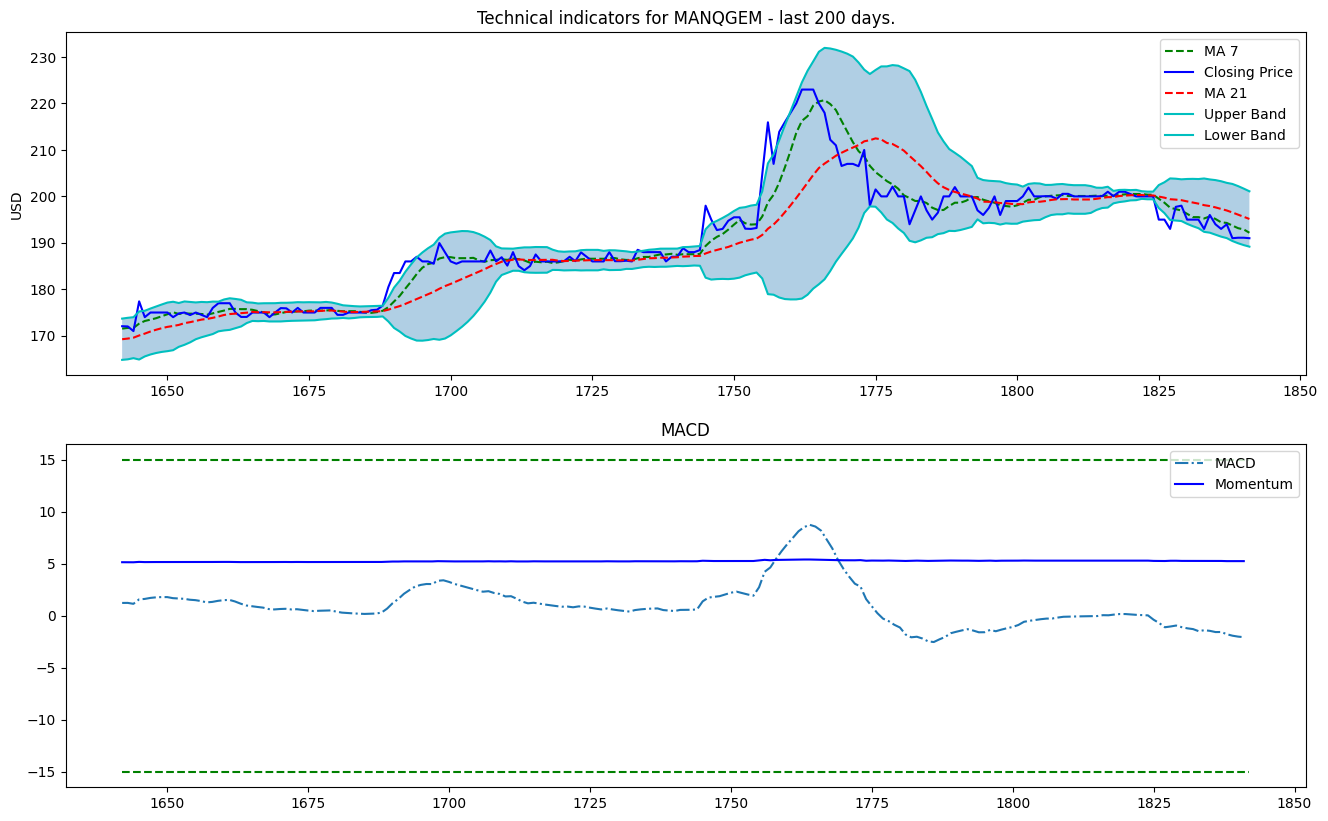

In [17]:
def plot_technical_indicators(dataset, last_days):
       plt.figure(figsize=(16, 10), dpi=100)
       shape_0 = dataset.shape[0]
       xmacd_ = shape_0 - last_days

       dataset = dataset.iloc[-last_days:, :]
       x_ = range(3, dataset.shape[0])
       x_ = list(dataset.index)

       # Plot first subplot
       plt.subplot(2, 1, 1)
       plt.plot(dataset['MA7'], label='MA 7', color='g', linestyle='--')
       plt.plot(dataset['Prix'], label='Closing Price', color='b')
       plt.plot(dataset['MA21'], label='MA 21', color='r', linestyle='--')
       plt.plot(dataset['upper_band'], label='Upper Band', color='c')
       plt.plot(dataset['lower_band'], label='Lower Band', color='c')
       plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
       plt.title('Technical indicators for MANQGEM - last {} days.'.format(last_days))
       plt.ylabel('USD')
       plt.legend()

       # Plot second subplot
       plt.subplot(2, 1, 2)
       plt.title('MACD')
       plt.plot(dataset['MACD'], label='MACD', linestyle='-.')
       plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
       plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
       plt.plot(dataset['logmomentum'], label='Momentum', color='b', linestyle='-')
       
       plt.legend()
       plt.show()
# T_df=dataset.sort_Prixs(by=['date'] , ascending=True)
plot_technical_indicators(T_df, 200)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


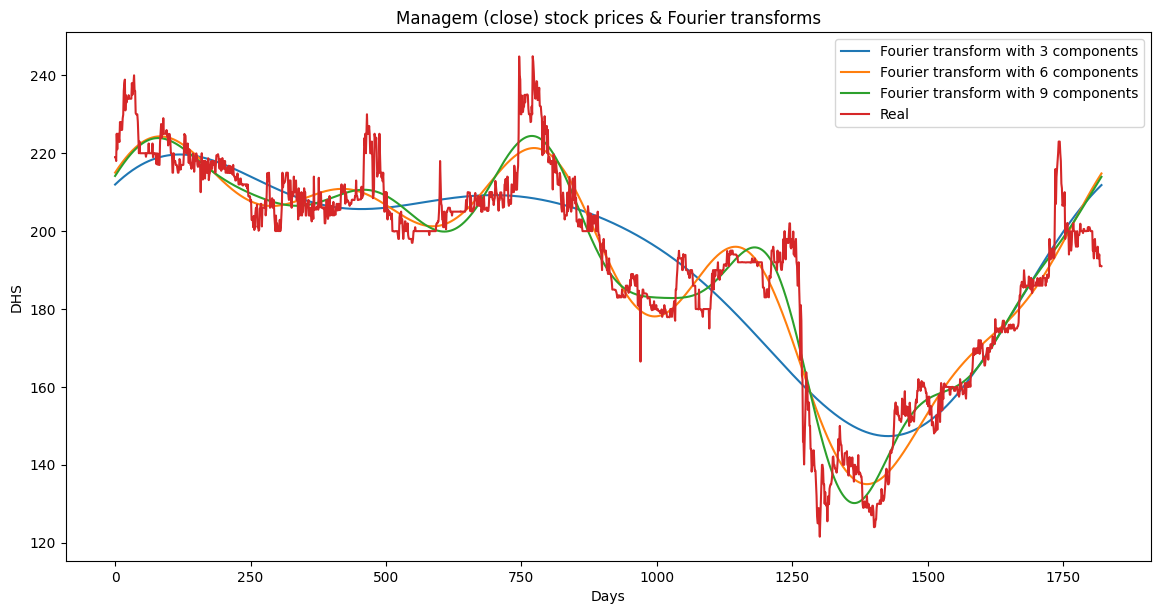

In [18]:
def plot_Fourier(dataset):
    data_FT = dataset[['Date','Prix']]

    close_fft = np.fft.fft(np.asarray(data_FT['Prix'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    plt.figure(figsize=(14, 7), dpi=100)
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    plt.plot(data_FT['Prix'], label='Real')
    plt.xlabel('Days')
    plt.ylabel('DHS')
    plt.title('Managem (close) stock prices & Fourier transforms')
    plt.legend()
    plt.show()
# dataset=dataset.sort_values(by=['date'] , ascending=True)
plot_Fourier(dataset)

In [19]:
# Set the date to datetime data
d=dataset.copy()



In [20]:
# datetime_series = pd.to_datetime(dataset['date'])
# datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(dataset.Date)
# dataset = dataset.sort_values(by='date')
dataset = dataset.drop(columns='Date')
# dataset=dataset.sort_values(by=['date'] , ascending=True)


In [21]:
dataset

,Ouverture,Plus haut,Plus bas,Prix,Quantité,MA7,MA21,MACD,20SD,upper_band,lower_band,EMA,logmomentum
Date,,,,,,,,,,,,,
2015-02-02,218.00,219.00,218.0,219.0,1493.0,219.700000,220.588095,-0.283747,3.146731,226.881557,214.294634,219.376826,5.384495
2015-02-03,216.05,219.00,216.0,219.0,700.0,219.557143,220.611905,-0.343087,2.881852,226.375609,214.848200,219.125609,5.384495
2015-02-04,218.00,219.90,218.0,218.0,38638.0,219.271429,220.754762,-0.450728,2.879186,226.513133,214.996390,218.375203,5.379897
2015-02-05,218.00,225.00,218.0,225.0,1530.0,220.271429,221.090476,-0.069187,3.011421,227.113319,215.067634,222.791734,5.411646
2015-02-06,221.00,221.00,221.0,221.0,93.0,220.414286,221.138095,-0.037029,2.997499,227.133093,215.143097,221.597245,5.393628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,194.00,194.00,194.0,194.0,270.0,194.285714,196.966667,-1.568112,2.974536,202.915738,191.017596,193.823424,5.262690
2022-05-27,193.00,193.00,191.0,191.0,18436.0,193.714286,196.535714,-1.783901,3.072453,202.680620,190.390808,191.941141,5.247024
2022-05-30,191.00,191.10,191.0,191.1,48898.0,193.157143,196.064286,-1.924659,3.074996,202.214277,189.914294,191.380380,5.247550


In [22]:
dataset.iloc[:, 3]

Date
2015-02-02    219.0
2015-02-03    219.0
2015-02-04    218.0
2015-02-05    225.0
2015-02-06    221.0
              ...  
2022-05-26    194.0
2022-05-27    191.0
2022-05-30    191.1
2022-05-31    191.1
2022-06-01    191.0
Name: Prix, Length: 1822, dtype: float64

In [23]:
X_value = pd.DataFrame(dataset.iloc[:, :])
y_value = pd.DataFrame(dataset.iloc[:, 3])


In [24]:
# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)


In [25]:
n_steps_in = 10
n_features = X_value.shape[1]
n_steps_out = 1
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 10 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

Split data

In [26]:
# get the train test predict index
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

# Split train/test dataset
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

# Get data and check shape
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
# index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)

In [27]:
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)

In [28]:

# %% --------------------------------------- Save dataset -----------------------------------------------------------------
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

# ConcatOp : Dimension 0 in both shapes must be equal: shape[0] = [398,1,1] vs. shape[1] = [401,3,1] [Op:ConcatV2] name: concat

X shape:  (1812, 10, 13)
y shape:  (1812, 1)
X_train shape:  (1268, 10, 13)
y_train shape:  (1268, 1)
y_c_train shape:  (1268, 10, 1)
X_test shape:  (544, 10, 13)
y_test shape:  (544, 1)
y_c_test shape:  (544, 10, 1)
index_train shape: (1268,)
index_test shape: (544,)


In [29]:
# Define the generator
def Generator(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(Bidirectional(GRU(units=256,
                  return_sequences=True,
                  input_shape=(input_dim, feature_size),
                  recurrent_dropout=0.02,
                  recurrent_regularizer=regularizers.l2(1e-3))))
    model.add(GRU(units=128,
                  #return_sequences=True,
                  recurrent_dropout=0.02,
                  recurrent_regularizer=regularizers.l2(1e-3)))
    #model.add(Dense(128,
    #              kernel_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(64, kernel_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-3)))
    #model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-3)))
    #model.add(Dense(8, kernel_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(units=output_dim))
    # model = Sequential()
    # model.add(Bidirectional(LSTM(units=256,
    #               return_sequences=True,
    #               input_shape=(input_dim, feature_size),
    #               recurrent_dropout=0.02,
    #               )))
    # model.add(LSTM(units=128,
    #               #return_sequences=True,
    #               recurrent_dropout=0.02,
    #               ))
    # #model.add(Dense(128,
    # #              kernel_regularizer=regularizers.l2(1e-3)))
    # model.add(Dense(64))
    # model.add(Dense(32))
    # #model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-3)))
    # #model.add(Dense(8, kernel_regularizer=regularizers.l2(1e-3)))
    # model.add(Dense(units=output_dim))
    return model

In [30]:
# Define the discriminator
def Discriminator()  -> tf.keras.models.Model:
    model = tf.keras.Sequential()
    model.add(Conv1D(32, input_shape=(11, 1), kernel_size=3, strides=2, padding="same", activation=LeakyReLU(alpha=0.01)))
    model.add(Conv1D(64, kernel_size=3, strides=2, padding="same", activation=LeakyReLU(alpha=0.01)))
    model.add(Conv1D(128, kernel_size=3, strides=2, padding="same", activation=LeakyReLU(alpha=0.01)))
    model.add(Flatten())
    model.add(Dense(220, use_bias=True))
    model.add(LeakyReLU())
    model.add(Dense(220, use_bias=True))
    model.add(ReLU())
    model.add(Dense(1))
    return model

In [31]:
# Train WGAN-GP model
class GAN():
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.d_optimizer = tf.keras.optimizers.Adam(0.0001)
        self.g_optimizer = tf.keras.optimizers.Adam(0.0001)
        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = 8
        checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.g_optimizer,
                                              discriminator_optimizer=self.d_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def gradient_penalty(self, batch_size, real_output, fake_output):
        """ Calculates the gradient penalty.
        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # get the interpolated data
        alpha = tf.random.normal([batch_size, 11, 1], 0.0, 1.0)
        diff = fake_output - tf.cast(real_output, tf.float32)
        interpolated = tf.cast(real_output, tf.float32) + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator(interpolated, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]

        # 3. Calcuate the norm of the gradients
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2]))

        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, data):
        real_input, real_price, yc = data
        batch_size = tf.shape(real_input)[0]
       
        for _ in range(1):
            with tf.GradientTape() as d_tape:
                # Train the discriminator
                # generate fake output
                generated_data = self.generator(real_input, training=True)


                # reshape the data
                # ConcatOp : Dimension 0 in both shapes must be equal: shape[0] = [398,1,1] vs. shape[1] = [415,3,1] [Op:ConcatV2] name: concat
                
                generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
                fake_output = tf.concat([generated_data_reshape, tf.cast(yc, tf.float32)], axis=1)
                real_y_reshape = tf.reshape(real_price, [real_price.shape[0], real_price.shape[1], 1])
                real_output = tf.concat([tf.cast(real_y_reshape, tf.float32), tf.cast(yc, tf.float32)], axis=1)


                # Get the logits for the fake images
                D_real = self.discriminator(real_output, training=True)

                # Get the logits for real images

                D_fake = self.discriminator(fake_output, training=True)

                # Calculate discriminator loss using fake and real logits

                real_loss = tf.cast(tf.reduce_mean(D_real), tf.float32)
                fake_loss = tf.cast(tf.reduce_mean(D_fake), tf.float32)
                d_cost = fake_loss-real_loss
                # Calculate the gradientjiu penalty

                gp = self.gradient_penalty(batch_size, real_output, fake_output)

                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * 10

            d_grads = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
            self.d_optimizer.apply_gradients(zip(d_grads, self.discriminator.trainable_variables))
        for _ in range(3):
            with tf.GradientTape() as g_tape:
                # Train the generator
                # generate fake output
                generated_data = self.generator(real_input, training=True)
                # reshape the data
                generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
                fake_output = tf.concat([generated_data_reshape, tf.cast(yc, tf.float32)], axis=1)
                # Get the discriminator logits for fake images
                G_fake = self.discriminator(fake_output, training=True)
                # Calculate the generator loss
                g_loss = -tf.reduce_mean(G_fake)
            g_grads = g_tape.gradient(g_loss, self.generator.trainable_variables)
            self.g_optimizer.apply_gradients(zip(g_grads, self.generator.trainable_variables))

        return real_price, generated_data, {'d_loss': d_loss, 'g_loss': g_loss}

    def train(self, X_train, y_train, yc, epochs):
        data = X_train, y_train, yc
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []


        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(data)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price)
            Real_price.append(real_price)

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(generator, 'gen_GRU_model_%d.h5' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix)
                print('epoch', epoch+1, 'd_loss', loss['d_loss'].numpy(), 'g_loss', loss['g_loss'].numpy())

            # For printing loss
            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)
            
        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        # Plot the loss
        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        plt.savefig('train_loss.png')

        print("REAL", Real_price.shape)
        print(Real_price)
        print("PREDICTED", Predicted_price.shape)
        print(Predicted_price)

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)


epoch 15 d_loss 8.228392 g_loss -0.052917082
epoch 30 d_loss 6.113146 g_loss 0.17706428
epoch 45 d_loss 4.214354 g_loss -0.07745808
epoch 60 d_loss 1.5888984 g_loss -0.13814329
epoch 75 d_loss 0.55656624 g_loss -0.20271778
epoch 90 d_loss 0.4802407 g_loss -0.19931632
epoch 105 d_loss 0.29659924 g_loss -0.17718938
epoch 120 d_loss 0.19863068 g_loss -0.17749652
epoch 135 d_loss 0.12676528 g_loss -0.18071494
epoch 150 d_loss 0.089046456 g_loss -0.17879528


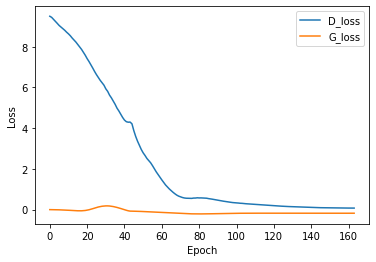

REAL (1268, 1)
[[ 0.69355493]
 [ 0.72598298]
 [ 0.69355493]
 ...
 [-0.4171058 ]
 [-0.31576814]
 [-0.4203486 ]]
PREDICTED (1268, 1)
[[ 0.79056996]
 [ 0.79072565]
 [ 0.789398  ]
 ...
 [-0.21089886]
 [-0.21713151]
 [-0.22822796]]


<Figure size 432x288 with 0 Axes>

In [32]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]
epoch = 164
generator = Generator(X_train.shape[1], output_dim, X_train.shape[2])
discriminator = Discriminator()
gan = GAN(generator, discriminator)
Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, epoch)     

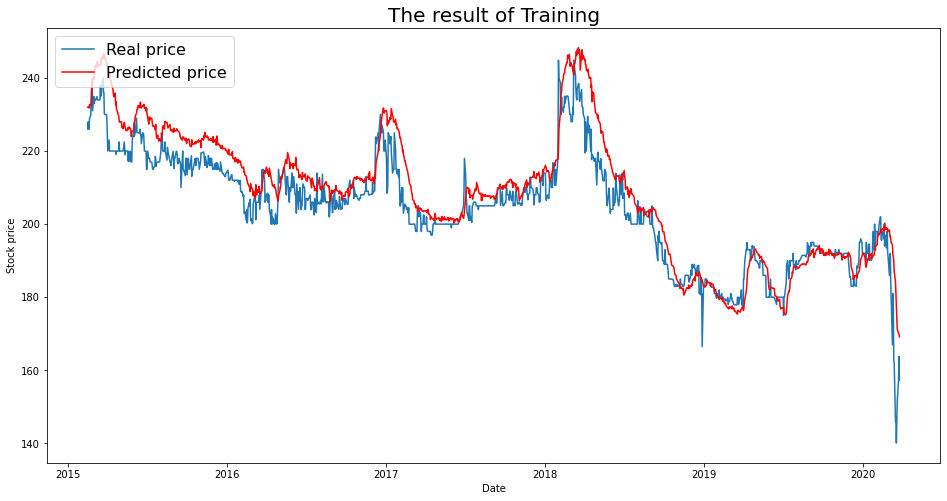

MSE: 52.540001412999544
MAE: 5.485064271271042
-- RMSE --  7.248448207237156


<Figure size 432x288 with 0 Axes>

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Rescale back the real dataset
# X_scaler = load(open('X_scaler.pkl', 'rb'))
# y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = index_train
test_predict_index = index_test

# print("----- predicted price -----", Predicted_price)

rescaled_Real_price = y_scaler.inverse_transform(Real_price)
rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

# print("----- rescaled predicted price -----", rescaled_Predicted_price)
# print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

predict_result = pd.DataFrame()
for i in range(rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

real_price = pd.DataFrame()
for i in range(rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training", fontsize=20)
plt.show()
plt.savefig('train_plot.png')

# Calculate RMSE
predicted = predict_result["predicted_mean"]
real = real_price["real_mean"]
For_MSE = pd.concat([predicted, real], axis = 1)
RMSE = np.sqrt(mean_squared_error(predicted, real))
mse = mean_squared_error(real, predicted)
print('MSE: '+str(mse))
  #mean absolute error(predicted, real)
mae = mean_absolute_error(real, predicted)
print('MAE: '+str(mae))
print('-- RMSE -- ', RMSE)

In [34]:
# Create the testing data set
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predicted - real) ** 2)))
mse = mean_squared_error(real, predicted)
print('MSE: '+str(mse))
  #mean absolute error(predicted, real)
mae = mean_absolute_error(real, predicted)
print('MAE: '+str(mae))
  #root mean squared error
# rmse = math.sqrt(mean_squared_error(y_test, predictions))
print('RMSE: '+str(rmse))

MSE: 52.540001412999544
MAE: 5.485064271271042
RMSE: 7.248448207237153


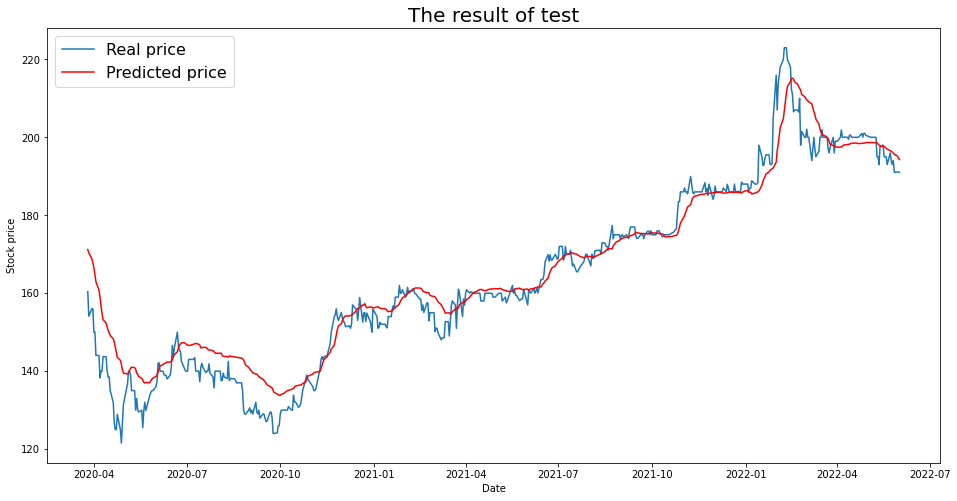

-- RMSE --  5.810929327190419
MSE: 33.766899645601704
MAE: 4.052326997633175
RMSE: 5.810929327190419


<Figure size 432x288 with 0 Axes>

In [36]:
G_model = tf.keras.models.load_model('/content/gen_GRU_model_149.h5')  
X_test =  X_test
y_test = y_test


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    #drop 2020
    # Input_Before = '2020-01-01'
    # predict_result = predict_result.loc[predict_result.index < Input_Before]
    # real_price = real_price.loc[real_price.index < Input_Before]

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.show()
    plt.savefig('test_plot.png')
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    rmse = np.sqrt(np.mean(((predicted - real) ** 2)))
    mse = mean_squared_error(real, predicted)
    print('MSE: '+str(mse))
  #mean absolute error(predicted, real)
    mae = mean_absolute_error(real, predicted)
    print('MAE: '+str(mae))
  #root mean squared error
# rmse = math.sqrt(mean_squared_error(y_test, predictions))
    print('RMSE: '+str(rmse)) 
    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)
test_predicted.to_csv("test_predicted.csv")